In [89]:
# Standard imports
import sys
from pathlib import Path
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)

In [90]:
import sys
from pathlib import Path

# Detect the real project root explicitly
root = Path().resolve().parents[0]

# If running notebooks/01_... then root should be "aml-mule-risk-scoring"
while root.name != "aml-mule-risk-scoring":
    root = root.parent

src_path = root / "src"
sys.path.append(str(src_path))

print("Project root:", root)
print("SRC Path added:", src_path)

Project root: /Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring
SRC Path added: /Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring/src


In [91]:
import importlib
import data_generation
importlib.reload(data_generation)

<module 'data_generation' from '/Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring/src/data_generation.py'>

In [92]:
# Generate synthetic dataset (currently with placeholder logic)
accounts_df, transactions_df = generate_full_dataset()

accounts_df.head(), transactions_df.head()

=== FAN-IN DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule collector sample: [2278, 3387, 1353, 4169, 2040]

Pattern 1: dst=2278, senders_count=43
  TX: [None, np.int64(6), 1725, 2278, 2680.65]
  TX: [None, np.int64(89), 2224, 2278, 4255.66]
  TX: [None, np.int64(35), 1021, 2278, 2811.48]
  TX: [None, np.int64(67), 4960, 2278, 4707.8]

Pattern 2: dst=3387, senders_count=15

Pattern 3: dst=1353, senders_count=17

Pattern 4: dst=4169, senders_count=14

Pattern 5: dst=2040, senders_count=40

Pattern 6: dst=4743, senders_count=18

Pattern 7: dst=2497, senders_count=27

Pattern 8: dst=2040, senders_count=14

Pattern 9: dst=2198, senders_count=36

Pattern 10: dst=1626, senders_count=34

Pattern 11: dst=3176, senders_count=25

Pattern 12: dst=1071, senders_count=34

Pattern 13: dst=4958, senders_count=19

Pattern 14: dst=3868, senders_count=41

Pattern 15: dst=36, senders_count=11

Pattern 16: dst=2278, senders_count=38

Pattern 17: dst=1353, senders_count=48

Patter

(   account_id  is_mule  account_open_day
 0           0        0                 0
 1           1        0                10
 2           2        0                24
 3           3        0                 0
 4           4        0                26,
    txn_id  timestamp_day  src_account_id  dst_account_id   amount typology
 0       0              6            1725            2278  2680.65   fan_in
 1       1             89            2224            2278  4255.66   fan_in
 2       2             35            1021            2278  2811.48   fan_in
 3       3             67            4960            2278  4707.80   fan_in
 4       4             18              95            2278  3261.86   fan_in)

In [61]:
print("Accounts shape:", accounts_df.shape)
print("Transactions shape:", transactions_df.shape)

print("\nMule distribution:")
print(accounts_df['is_mule'].value_counts())

Accounts shape: (5000, 4)
Transactions shape: (103150, 6)

Mule distribution:
is_mule
0    4850
1     150
Name: count, dtype: int64


In [62]:
print("Typology types:")
print(accounts_df['typology_type'].value_counts())

Typology types:
typology_type
normal    5000
Name: count, dtype: int64


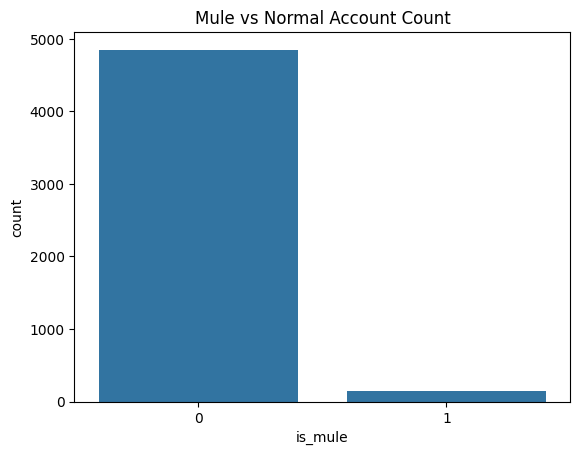

In [63]:
sns.countplot(data=accounts_df, x="is_mule")
plt.title("Mule vs Normal Account Count")
plt.show()

In [64]:
fan_in_txn = generate_transactions_fan_in(accounts_df)
fan_in_txn.shape

=== FAN-IN DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule collector sample: [4530, 3899, 4045, 4108, 185]

Pattern 1: dst=4530, senders_count=33
  TX: [None, np.int64(69), 790, 4530, 4915.46]
  TX: [None, np.int64(84), 2199, 4530, 2071.95]
  TX: [None, np.int64(36), 1158, 4530, 4644.18]
  TX: [None, np.int64(40), 84, 4530, 2115.28]

Pattern 2: dst=3899, senders_count=15

Pattern 3: dst=4045, senders_count=21

Pattern 4: dst=4108, senders_count=36

Pattern 5: dst=185, senders_count=13

Pattern 6: dst=3296, senders_count=30

Pattern 7: dst=2787, senders_count=47

Pattern 8: dst=153, senders_count=35

Pattern 9: dst=4743, senders_count=41

Pattern 10: dst=978, senders_count=36

Pattern 11: dst=4752, senders_count=33

Pattern 12: dst=2437, senders_count=18

Pattern 13: dst=2682, senders_count=21

Pattern 14: dst=4752, senders_count=38

Pattern 15: dst=2156, senders_count=25

Pattern 16: dst=185, senders_count=31

Pattern 17: dst=2163, senders_count=23

Pattern 18

(926, 5)

In [65]:
print("Mules:", accounts_df[accounts_df["is_mule"] == 1].shape[0])
print("Normals:", accounts_df[accounts_df["is_mule"] == 0].shape[0])

Mules: 150
Normals: 4850


In [66]:
from data_generation import RNG, SIM_DAYS

print("Sample senders test:", RNG.integers(10, 50))

Sample senders test: 42


In [67]:
print("SIM_DAYS:", SIM_DAYS)

SIM_DAYS: 90


In [68]:
mule_accounts = accounts_df[accounts_df["is_mule"] == 1]["account_id"].sample(30, replace=True)
mule_accounts.head()

4194    4194
3254    3254
889      889
3497    3497
1380    1380
Name: account_id, dtype: int64

In [69]:
import data_generation
print(data_generation.__file__)

/Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring/src/data_generation.py


In [72]:
import importlib, data_generation
importlib.reload(data_generation)

from data_generation import generate_transactions_fan_in

fan_in_txn = generate_transactions_fan_in(accounts_df)
fan_in_txn.shape

=== FAN-IN DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule collector sample: [1626, 432, 3427, 1784, 4107]

Pattern 1: dst=1626, senders_count=13
  TX: [None, np.int64(69), 1140, 1626, 2755.51]
  TX: [None, np.int64(38), 1859, 1626, 3789.47]
  TX: [None, np.int64(77), 2902, 1626, 1376.71]
  TX: [None, np.int64(47), 1346, 1626, 4044.56]

Pattern 2: dst=432, senders_count=16

Pattern 3: dst=3427, senders_count=22

Pattern 4: dst=1784, senders_count=15

Pattern 5: dst=4107, senders_count=29

Pattern 6: dst=3814, senders_count=42

Pattern 7: dst=3006, senders_count=37

Pattern 8: dst=1801, senders_count=15

Pattern 9: dst=2279, senders_count=11

Pattern 10: dst=2102, senders_count=30

Pattern 11: dst=2824, senders_count=30

Pattern 12: dst=2130, senders_count=10

Pattern 13: dst=3702, senders_count=15

Pattern 14: dst=3456, senders_count=27

Pattern 15: dst=2682, senders_count=13

Pattern 16: dst=2816, senders_count=23

Pattern 17: dst=3427, senders_count=40

Patt

(807, 6)

In [71]:
from data_generation import generate_transactions_fan_out

fan_out_txn = generate_transactions_fan_out(accounts_df)
print(fan_out_txn.shape)
print(fan_out_txn["typology_type"].value_counts())

=== FAN-OUT DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule sender sample: [808, 2310, 449, 2182, 1601]

Pattern 1: src=808, receivers_count=49
  TX: [None, np.int64(61), 808, 3696, 4707.48]
  TX: [None, np.int64(79), 808, 1501, 2953.98]
  TX: [None, np.int64(83), 808, 4735, 2071.51]
  TX: [None, np.int64(69), 808, 1506, 1029.16]

Pattern 2: src=2310, receivers_count=18

Pattern 3: src=449, receivers_count=37

Pattern 4: src=2182, receivers_count=38

Pattern 5: src=1601, receivers_count=21

Pattern 6: src=3456, receivers_count=13

Pattern 7: src=4636, receivers_count=14

Pattern 8: src=954, receivers_count=29

Pattern 9: src=2812, receivers_count=34

Pattern 10: src=2019, receivers_count=38

Pattern 11: src=2040, receivers_count=10

Pattern 12: src=3899, receivers_count=38

Pattern 13: src=4122, receivers_count=46

Pattern 14: src=375, receivers_count=25

Pattern 15: src=4160, receivers_count=46

Pattern 16: src=3810, receivers_count=36

Pattern 17: src=3915, 

KeyError: 'typology_type'

In [73]:
import importlib, data_generation
importlib.reload(data_generation)

from data_generation import generate_transactions_fan_out


fan_out_txn = generate_transactions_fan_out(accounts_df)
fan_out_txn.shape

=== FAN-OUT DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule sender sample: [153, 3724, 1962, 889, 3151]

Pattern 1: src=153, receivers_count=13
  TX: [None, np.int64(69), 153, 3494, 2755.51]
  TX: [None, np.int64(38), 153, 1886, 3789.47]
  TX: [None, np.int64(77), 153, 4595, 1376.71]
  TX: [None, np.int64(47), 153, 4783, 4044.56]

Pattern 2: src=3724, receivers_count=16

Pattern 3: src=1962, receivers_count=22

Pattern 4: src=889, receivers_count=15

Pattern 5: src=3151, receivers_count=29

Pattern 6: src=1109, receivers_count=42

Pattern 7: src=3814, receivers_count=37

Pattern 8: src=1071, receivers_count=15

Pattern 9: src=4194, receivers_count=11

Pattern 10: src=3296, receivers_count=30

Pattern 11: src=4981, receivers_count=30

Pattern 12: src=153, receivers_count=10

Pattern 13: src=1735, receivers_count=15

Pattern 14: src=4958, receivers_count=27

Pattern 15: src=4958, receivers_count=13

Pattern 16: src=3006, receivers_count=23

Pattern 17: src=291, 

(807, 6)

In [29]:
fan_out_txn['src_account_id'].value_counts().head()

src_account_id
1806    65
4122    60
4088    56
2661    49
4636    46
Name: count, dtype: int64

In [30]:
fan_out_txn['dst_account_id'].nunique()

751

In [31]:
fan_out_txn['amount'].describe()

count     807.000000
mean     3005.859244
std      1170.339338
min      1002.070000
25%      1967.710000
50%      2976.570000
75%      4057.180000
max      4997.690000
Name: amount, dtype: float64

In [32]:
print("Top sender accounts (should be mule IDs with high counts):")
print(fan_out_txn['src_account_id'].value_counts().head(10))

Top sender accounts (should be mule IDs with high counts):
src_account_id
1806    65
4122    60
4088    56
2661    49
4636    46
3702    45
2343    44
332     42
3353    40
1542    34
Name: count, dtype: int64


In [ ]:
print("Number of unique receivers:")
print(fan_out_txn['dst_account_id'].nunique())

Number of unique receivers:
751


In [35]:
print("Amount stats:")
print(fan_out_txn['amount'].describe())

Amount stats:
count     807.000000
mean     3005.859244
std      1170.339338
min      1002.070000
25%      1967.710000
50%      2976.570000
75%      4057.180000
max      4997.690000
Name: amount, dtype: float64


In [36]:
print("Timestamp day range:")
print(fan_out_txn['timestamp_day'].min(), fan_out_txn['timestamp_day'].max())

Timestamp day range:
0 89


In [37]:
print("Top receiver accounts (should be mule IDs with high counts):")
print(fan_in_txn['dst_account_id'].value_counts().head(10))

Top receiver accounts (should be mule IDs with high counts):
dst_account_id
2019    75
3006    56
3088    49
2824    44
932     42
3708    40
569     40
1219    37
4754    34
291     31
Name: count, dtype: int64


In [38]:
print("Number of unique senders:")
print(fan_in_txn['src_account_id'].nunique())

Number of unique senders:
743


In [39]:
print("Fan-in amount stats:")
print(fan_in_txn['amount'].describe())

Fan-in amount stats:
count     807.000000
mean     3005.859244
std      1170.339338
min      1002.070000
25%      1967.710000
50%      2976.570000
75%      4057.180000
max      4997.690000
Name: amount, dtype: float64


In [40]:
print("Fan-in timestamp day range:")
print(fan_in_txn['timestamp_day'].min(), fan_in_txn['timestamp_day'].max())

Fan-in timestamp day range:
0 89


In [74]:
import importlib, data_generation
importlib.reload(data_generation)

from data_generation import generate_transactions_velocity


vel_txn = generate_transactions_velocity(accounts_df)
vel_txn.shape
vel_txn.head(10)

=== VELOCITY DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850

Example velocity pair:
IN:  [None, np.int64(7), np.int64(1643), np.int64(2193), 4633.27]
OUT: [None, np.int64(8), np.int64(2193), np.int64(1114), 4458.72]

Example velocity pair:
IN:  [None, np.int64(7), np.int64(1147), np.int64(3353), 2565.06]
OUT: [None, np.int64(8), np.int64(3353), np.int64(428), 2369.45]

Example velocity pair:
IN:  [None, np.int64(64), np.int64(589), np.int64(3915), 6716.39]
OUT: [None, np.int64(65), np.int64(3915), np.int64(2681), 6673.33]

DEBUG (velocity): Total rows generated: 400
=== VELOCITY DEBUG END ===



,txn_id,timestamp_day,src_account_id,dst_account_id,amount,typology
0,None,7,1643,2193,4633.27,velocity
1,None,8,2193,1114,4458.72,velocity
2,None,7,1147,3353,2565.06,velocity
3,None,8,3353,428,2369.45,velocity
4,None,64,589,3915,6716.39,velocity
5,None,65,3915,2681,6673.33,velocity
6,None,73,1922,2182,4224.79,velocity
7,None,73,2182,3795,4037.97,velocity
8,None,68,3709,932,6936.57,velocity
9,None,69,932,99,6836.76,velocity


In [43]:
print(vel_txn.shape)
vel_txn.head(12)

(400, 5)


,txn_id,timestamp_day,src_account_id,dst_account_id,amount
0,None,7,1891,4530,4633.27
1,None,8,4530,2585,4458.72
2,None,7,1976,1962,2565.06
3,None,8,1962,4061,2369.45
4,None,64,4526,4743,6716.39
5,None,65,4743,2691,6673.33
6,None,73,4552,457,4224.79
7,None,73,457,250,4037.97
8,None,68,3085,2288,6936.57
9,None,69,2288,1958,6836.76


In [44]:
vel_txn['timestamp_day'].diff().value_counts().head(10)

timestamp_day
 1.0     102
 0.0     101
-5.0       6
 39.0      6
-18.0      5
-3.0       5
 2.0       4
 3.0       4
 25.0      4
-12.0      4
Name: count, dtype: int64

In [45]:
pd.Series(vel_txn.iloc[1::2]['amount'].values / vel_txn.iloc[0::2]['amount'].values).describe()

count    200.000000
mean       0.973403
std        0.017150
min        0.913008
25%        0.964685
50%        0.977526
75%        0.986312
max        0.996492
dtype: float64

In [75]:
import importlib, data_generation
importlib.reload(data_generation)

from data_generation import generate_transactions_structuring

structuring_txn = generate_transactions_structuring(accounts_df)
print(structuring_txn.shape)
print(structuring_txn['amount'].describe())
print((structuring_txn['amount'] < 10000).mean())

=== STRUCTURING DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Example mule receivers: [1784, 1374, 1374, 889, 889]

Pattern 1: dst=1784, deposits=7
  TX: [None, np.int64(69), 2896, 1784, 4906.02]
  TX: [None, np.int64(38), 4291, 1784, 7206.58]
  TX: [None, np.int64(77), 4146, 1784, 1838.18]
  TX: [None, np.int64(47), 1552, 1784, 7774.14]

Pattern 2: dst=1374, deposits=9

Pattern 3: dst=1374, deposits=23

Pattern 4: dst=889, deposits=15

Pattern 5: dst=889, deposits=13

Pattern 6: dst=1821, deposits=24

Pattern 7: dst=480, deposits=24

Pattern 8: dst=2019, deposits=12

Pattern 9: dst=3708, deposits=25

Pattern 10: dst=449, deposits=15

Pattern 11: dst=1784, deposits=10

Pattern 12: dst=3899, deposits=9

Pattern 13: dst=375, deposits=28

Pattern 14: dst=4973, deposits=25

Pattern 15: dst=394, deposits=21

Pattern 16: dst=1426, deposits=25

Pattern 17: dst=1626, deposits=6

Pattern 18: dst=2782, deposits=7

Pattern 19: dst=375, deposits=14

Pattern 20: dst=449, depo

In [48]:
structuring_txn['dst_account_id'].value_counts().head(10)

dst_account_id
3427    50
432     41
3176    36
4636    32
2343    30
1169    30
3962    28
4194    28
4904    28
3456    26
Name: count, dtype: int64

In [49]:
structuring_txn['src_account_id'].nunique()

762

In [50]:
structuring_txn['timestamp_day'].describe()

count    825.000000
mean      43.740606
std       26.432651
min        0.000000
25%       20.000000
50%       44.000000
75%       66.000000
max       89.000000
Name: timestamp_day, dtype: float64

In [51]:
(structuring_txn['amount'] < 10000).mean()

np.float64(1.0)

In [76]:
import importlib, data_generation
importlib.reload(data_generation)
from data_generation import generate_transactions_layering

layering_txn = generate_transactions_layering(accounts_df)

print("Layering shape:", layering_txn.shape)
print(layering_txn.head(5))

print("\nUnique layering hops:")
print(layering_txn.groupby("src_account_id")["dst_account_id"].nunique().sort_values(ascending=False).head(10))

print("\nAmount stats:")
print(layering_txn["amount"].describe())

print("\nTimestamp span:")
print(layering_txn["timestamp_day"].agg(["min","max"]))

=== LAYERING DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Sample mule entry accounts: [3006, 792, 1962, 3387, 3497]

Pattern 1: chain=[3006, 2241, np.int64(3868)], start_amount=6072.149078264366
  TX: [None, 69, 3006, 2241, 5802.89] loss: 0.0443439167964553
  TX: [None, 70, 2241, 3868, 5723.0] loss: 0.013767093915505981

Pattern 2: chain=[792, 4071, 1195, 221, np.int64(36)], start_amount=8327.977913932471
  TX: [None, 87, 792, 4071, 7982.85] loss: 0.04144257221107815
  TX: [None, 89, 4071, 1195, 7759.2] loss: 0.028015437515822687

Pattern 3: chain=[1962, 4834, 4004, np.int64(757)], start_amount=6103.899391791318

Pattern 4: chain=[3387, 1802, 2388, 3821, np.int64(1801)], start_amount=8306.614180597617

Pattern 5: chain=[3497, 561, np.int64(1515)], start_amount=4080.026444472835

Pattern 6: chain=[1821, 725, 3897, np.int64(2185)], start_amount=5593.217942244082

Pattern 7: chain=[2708, 1364, 3893, 2669, np.int64(1733)], start_amount=6060.063432106315

Pattern 8: 

In [77]:
import importlib, data_generation
importlib.reload(data_generation)

from data_generation import generate_normal_transactions

normal_txn = generate_normal_transactions(accounts_df, n_transactions=100_000)

print("Shape:", normal_txn.shape)
print(normal_txn.head(5))

print("\nTimestamp distribution:")
print(normal_txn["timestamp_day"].describe())

print("\nAmount distribution (log-normal check):")
print(normal_txn["amount"].describe())

print("\nTop senders (should be random, not clustered):")
print(normal_txn["src_account_id"].value_counts().head(10))

print("\nTop receivers (should be random, not clustered):")
print(normal_txn["dst_account_id"].value_counts().head(10))

=== NORMAL TXN DEBUG START ===
Total accounts: 5000
Transactions to generate: 100000
DEBUG: Total normal transactions created: 99990
=== NORMAL TXN DEBUG END ===

Shape: (99990, 6)
  txn_id  timestamp_day  src_account_id  dst_account_id   amount typology
0   None             38             446            3869  1772.25   normal
1   None             62            4292             429  1123.81   normal
2   None             64            2632            4878  3177.72   normal
3   None             11            3930            2566  1945.90   normal
4   None             70            2501            1853  4397.96   normal

Timestamp distribution:
count    99990.000000
mean        44.571807
std         26.008878
min          0.000000
25%         22.000000
50%         45.000000
75%         67.000000
max         89.000000
Name: timestamp_day, dtype: float64

Amount distribution (log-normal check):
count    99990.000000
mean      3361.283745
std       1726.877842
min        253.630000
25%      

In [78]:
# 1. Merge all transactions
transactions = pd.concat([
    fan_in_txn,
    fan_out_txn,
    vel_txn,
    structuring_txn,
    layering_txn,
    normal_txn
], ignore_index=True)

transactions.reset_index(inplace=True)
transactions.rename(columns={"index": "txn_id"}, inplace=True)

print("TOTAL transactions:", transactions.shape)

TOTAL transactions: (102934, 7)


In [87]:
normal_txn.head()

,txn_id,timestamp_day,src_account_id,dst_account_id,amount,typology
0,None,38,446,3869,1772.25,normal
1,None,62,4292,429,1123.81,normal
2,None,64,2632,4878,3177.72,normal
3,None,11,3930,2566,1945.90,normal
4,None,70,2501,1853,4397.96,normal


In [94]:
transactions["typology"].value_counts()

typology
normal         99990
structuring      825
fan_in           807
fan_out          807
velocity         400
layering         105
Name: count, dtype: int64

In [95]:
transactions.groupby("typology")["amount"].describe()

,count,mean,std,min,25%,50%,75%,max
typology,,,,,,,,
fan_in,807.0,3005.859244,1170.339338,1002.07,1967.7100,2976.570,4057.180,4997.69
fan_out,807.0,3005.859244,1170.339338,1002.07,1967.7100,2976.570,4057.180,4997.69
layering,105.0,6482.086190,1483.515476,3489.08,5451.2500,6712.990,7672.410,9461.06
normal,99990.0,3361.283745,1726.877842,253.63,2131.5625,2979.240,4169.410,10000.00
structuring,825.0,5428.076412,2571.086331,1009.50,3182.8000,5359.440,7745.400,9894.85
velocity,400.0,4827.559775,1814.053587,1962.00,3160.8300,4766.035,6566.655,7994.63


In [98]:
transactions.head()

,txn_id,txn_id,timestamp_day,src_account_id,dst_account_id,amount,typology
0,0,None,69,1140,1626,2755.51,fan_in
1,1,None,38,1859,1626,3789.47,fan_in
2,2,None,77,2902,1626,1376.71,fan_in
3,3,None,47,1346,1626,4044.56,fan_in
4,4,None,87,4202,1626,4144.26,fan_in


In [97]:
from pathlib import Path

Path("data").mkdir(exist_ok=True)

accounts_df.to_csv("data/accounts_simulated.csv", index=False)
transactions.to_csv("data/transactions_simulated.csv", index=False)

print("Data saved!")

Data saved!
